In [ ]:
# https://www.hsbc.com.hk/mpf/tool/unit-prices/

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# Load dataset 1
data1 = pd.read_csv("./data/hsbc_hang_seng_index_tracking_fund_02022020-01022021.csv") 
data1.head(5)

,Hang Seng Index Tracking Fund,BID,OFFER
0,\t2020-02-03,26.35,26.35
1,\t2020-02-04,26.70,26.70
2,\t2020-02-05,26.78,26.78
3,\t2020-02-06,27.48,27.48
4,\t2020-02-07,27.39,27.39


In [63]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Hang Seng Index Tracking Fund  249 non-null    object 
 1   BID                            249 non-null    float64
 2   OFFER                          249 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.0+ KB


In [64]:
data1['Hang Seng Index Tracking Fund'] = pd.to_datetime(data1['Hang Seng Index Tracking Fund'], format='%Y-%m-%d')
data1.rename(columns={'Hang Seng Index Tracking Fund': 'DATE', 'BID': 'BID Price', 'OFFER': 'OFFER Price'}, inplace=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         249 non-null    datetime64[ns]
 1   BID Price    249 non-null    float64       
 2   OFFER Price  249 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 6.0 KB


In [65]:
data1.head(5)

,DATE,BID Price,OFFER Price
0,2020-02-03,26.35,26.35
1,2020-02-04,26.70,26.70
2,2020-02-05,26.78,26.78
3,2020-02-06,27.48,27.48
4,2020-02-07,27.39,27.39


In [66]:
data1.set_index('DATE', inplace = True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2020-02-03 to 2021-02-01
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BID Price    249 non-null    float64
 1   OFFER Price  249 non-null    float64
dtypes: float64(2)
memory usage: 5.8 KB


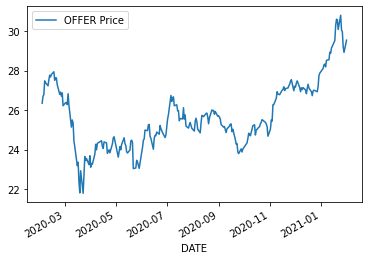

In [67]:
data1.plot(y=['OFFER Price'], use_index=True, kind='line')
plt.show()

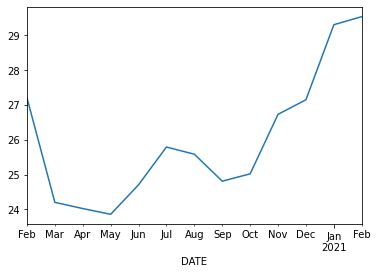

In [68]:
data1.resample('1M').mean()['OFFER Price'].plot()

In [71]:
data1['DATE'] = data1.index
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2020-02-03 to 2021-02-01
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   BID Price    249 non-null    float64       
 1   OFFER Price  249 non-null    float64       
 2   DATE         249 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 7.8 KB


In [72]:
data1['month_year'] = data1['DATE'].dt.to_period('M')
data1

,BID Price,OFFER Price,DATE,month_year
DATE,,,,
2020-02-03,26.35,26.35,2020-02-03,2020-02
2020-02-04,26.70,26.70,2020-02-04,2020-02
2020-02-05,26.78,26.78,2020-02-05,2020-02
2020-02-06,27.48,27.48,2020-02-06,2020-02
2020-02-07,27.39,27.39,2020-02-07,2020-02
...,...,...,...,...
2021-01-26,30.06,30.06,2021-01-26,2021-01
2021-01-27,29.96,29.96,2021-01-27,2021-01
2021-01-28,29.20,29.20,2021-01-28,2021-01


In [99]:
data1a = data1.groupby(['month_year'], sort=True, as_index=False)['OFFER Price'].mean()
data1a['OFFER Price Diff'] = data1a['OFFER Price'].diff()
data1a

,month_year,OFFER Price,OFFER Price Diff
0,2020-02,27.211500,NaN
1,2020-03,24.204545,-3.006955
2,2020-04,24.026316,-0.178230
3,2020-05,23.860500,-0.165816
4,2020-06,24.708571,0.848071
5,2020-07,25.793636,1.085065
6,2020-08,25.587143,-0.206494
7,2020-09,24.812727,-0.774416
8,2020-10,25.023889,0.211162
9,2020-11,26.733810,1.709921


In [100]:
data1a['OFFER Price Diff'].mean()

0.19404166666666653

In [22]:
# Load dataset 2
data2 = pd.read_csv("./data/hsbc_north_american_equity_fund_02022020-01022021.csv") 
data2.head(5)

,North American Equity Fund,BID,OFFER
0,\t2020-02-03,18.62,18.62
1,\t2020-02-04,18.89,18.89
2,\t2020-02-05,19.11,19.11
3,\t2020-02-06,19.19,19.19
4,\t2020-02-07,19.11,19.11


In [23]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   North American Equity Fund  249 non-null    object 
 1   BID                         249 non-null    float64
 2   OFFER                       249 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.0+ KB


In [24]:
data2['North American Equity Fund'] = pd.to_datetime(data2['North American Equity Fund'], format='%Y-%m-%d')
data2.rename(columns={'North American Equity Fund': 'DATE', 'BID': 'BID Price', 'OFFER': 'OFFER Price'}, inplace=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         249 non-null    datetime64[ns]
 1   BID Price    249 non-null    float64       
 2   OFFER Price  249 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 6.0 KB


In [25]:
data2.head(5)

,DATE,BID Price,OFFER Price
0,2020-02-03,18.62,18.62
1,2020-02-04,18.89,18.89
2,2020-02-05,19.11,19.11
3,2020-02-06,19.19,19.19
4,2020-02-07,19.11,19.11


In [26]:
data2.set_index('DATE', inplace = True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2020-02-03 to 2021-02-01
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BID Price    249 non-null    float64
 1   OFFER Price  249 non-null    float64
dtypes: float64(2)
memory usage: 5.8 KB


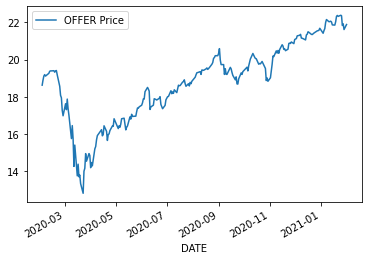

In [89]:
data2.plot(y=['OFFER Price'], use_index=True, kind='line')
plt.show()

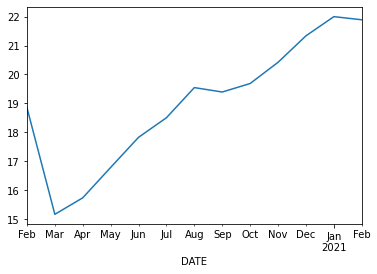

In [27]:
data2.resample('1M').mean()['OFFER Price'].plot()

In [117]:
data1_data2_join = pd.merge(data1, data2, left_index=True, right_index=True)
data1_data2_join.rename(columns={'BID Price_x': 'HSIDF BID Price', 
                                  'OFFER Price_x': 'HSIDF OFFER Price',
                                 'BID Price_y': 'NAEF BID Price',
                                 'OFFER Price_y': 'NAEF OFFER Price'}, inplace=True)
data1_data2_join.head()

,HSIDF BID Price,HSIDF OFFER Price,NAEF BID Price,NAEF OFFER Price
DATE,,,,
2020-02-03,26.35,26.35,18.62,18.62
2020-02-04,26.70,26.70,18.89,18.89
2020-02-05,26.78,26.78,19.11,19.11
2020-02-06,27.48,27.48,19.19,19.19
2020-02-07,27.39,27.39,19.11,19.11


In [118]:
data1_data2_join=data1_data2_join[['HSIDF OFFER Price','NAEF OFFER Price']]
data1_data2_join.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2020-02-03 to 2021-02-01
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HSIDF OFFER Price  249 non-null    float64
 1   NAEF OFFER Price   249 non-null    float64
dtypes: float64(2)
memory usage: 5.8 KB


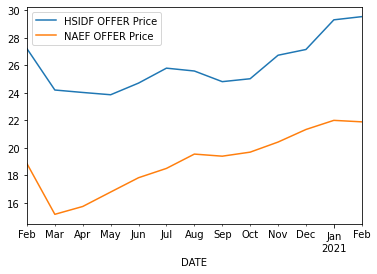

In [119]:
data1_data2_join.resample('1M').mean()[['HSIDF OFFER Price','NAEF OFFER Price']].plot()

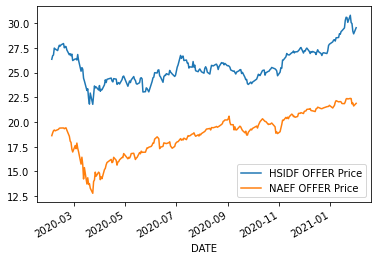

In [120]:
data1_data2_join.plot(y=['HSIDF OFFER Price','NAEF OFFER Price'], use_index=True, kind='line')
plt.show()

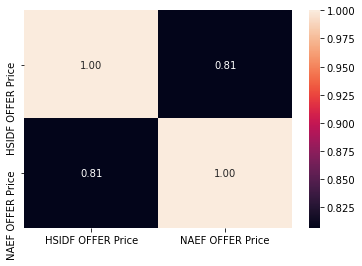

In [121]:
sns.heatmap(data1_data2_join.corr(), annot=True, fmt=".2f")
plt.show()

In [90]:
# Load dataset 3
data3 = pd.read_csv("./data/hsbc_balanced_fund_02022020-01022021.csv") 
data3.head(5)

,Balanced Fund,BID,OFFER
0,\t2020-02-03,19.85,19.85
1,\t2020-02-04,20.09,20.09
2,\t2020-02-05,20.20,20.20
3,\t2020-02-06,20.36,20.36
4,\t2020-02-07,20.32,20.32


In [91]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Balanced Fund  249 non-null    object 
 1   BID            249 non-null    float64
 2   OFFER          249 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.0+ KB


In [98]:
data3['Balanced Fund'] = pd.to_datetime(data3['Balanced Fund'], format='%Y-%m-%d')
data3.rename(columns={'Balanced Fund': 'DATE', 'BID': 'BID Price', 'OFFER': 'OFFER Price'}, inplace=True)
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         249 non-null    datetime64[ns]
 1   BID Price    249 non-null    float64       
 2   OFFER Price  249 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 6.0 KB


In [99]:
data3.head(5)

,DATE,BID Price,OFFER Price
0,2020-02-03,19.85,19.85
1,2020-02-04,20.09,20.09
2,2020-02-05,20.20,20.20
3,2020-02-06,20.36,20.36
4,2020-02-07,20.32,20.32


In [100]:
data3.set_index('DATE', inplace = True)
data3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2020-02-03 to 2021-02-01
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BID Price    249 non-null    float64
 1   OFFER Price  249 non-null    float64
dtypes: float64(2)
memory usage: 5.8 KB


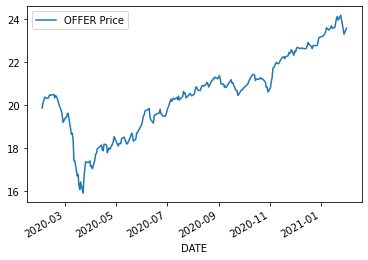

In [101]:
data3.plot(y=['OFFER Price'], use_index=True, kind='line')
plt.show()

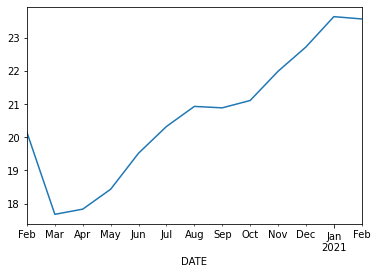

In [102]:
data3.resample('1M').mean()['OFFER Price'].plot()

In [103]:
# Load dataset 4
data4 = pd.read_csv("./data/hsbc_stable_fund_02022020-01022021.csv") 
data4.head(5)

,Stable Fund,BID,OFFER
0,\t2020-02-03,12.37,12.37
1,\t2020-02-04,12.41,12.41
2,\t2020-02-05,12.41,12.41
3,\t2020-02-06,12.46,12.46
4,\t2020-02-07,12.46,12.46


In [104]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Stable Fund  249 non-null    object 
 1   BID          249 non-null    float64
 2   OFFER        249 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.0+ KB


In [105]:
data4['Stable Fund'] = pd.to_datetime(data4['Stable Fund'], format='%Y-%m-%d')
data4.rename(columns={'Stable Fund': 'DATE', 'BID': 'BID Price', 'OFFER': 'OFFER Price'}, inplace=True)
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         249 non-null    datetime64[ns]
 1   BID Price    249 non-null    float64       
 2   OFFER Price  249 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 6.0 KB


In [106]:
data4.head(5)

,DATE,BID Price,OFFER Price
0,2020-02-03,12.37,12.37
1,2020-02-04,12.41,12.41
2,2020-02-05,12.41,12.41
3,2020-02-06,12.46,12.46
4,2020-02-07,12.46,12.46


In [107]:
data4.set_index('DATE', inplace = True)
data4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2020-02-03 to 2021-02-01
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BID Price    249 non-null    float64
 1   OFFER Price  249 non-null    float64
dtypes: float64(2)
memory usage: 5.8 KB


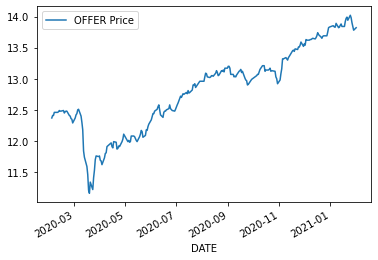

In [108]:
data4.plot(y=['OFFER Price'], use_index=True, kind='line')
plt.show()

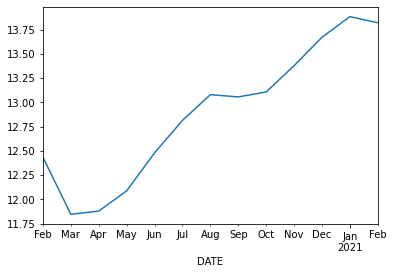

In [109]:
data4.resample('1M').mean()['OFFER Price'].plot()

In [111]:
data3_data4_join = pd.merge(data3, data4, left_index=True, right_index=True)
data3_data4_join.rename(columns={'BID Price_x': 'Balance BID Price', 
                                  'OFFER Price_x': 'Balance OFFER Price',
                                 'BID Price_y': 'Stable BID Price',
                                 'OFFER Price_y': 'Stable OFFER Price'}, inplace=True)
data3_data4_join.head()

,Balance BID Price,Balance OFFER Price,Stable BID Price,Stable OFFER Price
DATE,,,,
2020-02-03,19.85,19.85,12.37,12.37
2020-02-04,20.09,20.09,12.41,12.41
2020-02-05,20.20,20.20,12.41,12.41
2020-02-06,20.36,20.36,12.46,12.46
2020-02-07,20.32,20.32,12.46,12.46


In [112]:
data3_data4_join=data3_data4_join[['Balance OFFER Price','Stable OFFER Price']]
data3_data4_join.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2020-02-03 to 2021-02-01
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Balance OFFER Price  249 non-null    float64
 1   Stable OFFER Price   249 non-null    float64
dtypes: float64(2)
memory usage: 5.8 KB


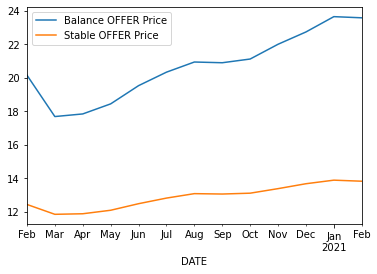

In [113]:
data3_data4_join.resample('1M').mean()[['Balance OFFER Price','Stable OFFER Price']].plot()

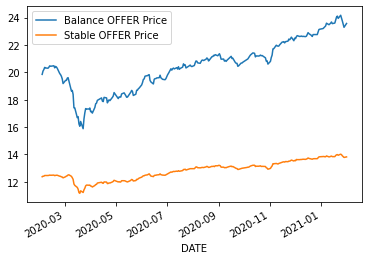

In [114]:
data3_data4_join.plot(y=['Balance OFFER Price','Stable OFFER Price'], use_index=True, kind='line')
plt.show()

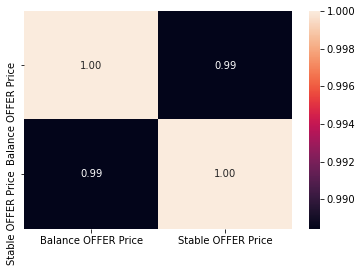

In [115]:
sns.heatmap(data3_data4_join.corr(), annot=True, fmt=".2f")
plt.show()

In [122]:
all_data_join = pd.merge(data1_data2_join, data3_data4_join, left_index=True, right_index=True)
all_data_join.head()

,HSIDF OFFER Price,NAEF OFFER Price,Balance OFFER Price,Stable OFFER Price
DATE,,,,
2020-02-03,26.35,18.62,19.85,12.37
2020-02-04,26.70,18.89,20.09,12.41
2020-02-05,26.78,19.11,20.20,12.41
2020-02-06,27.48,19.19,20.36,12.46
2020-02-07,27.39,19.11,20.32,12.46


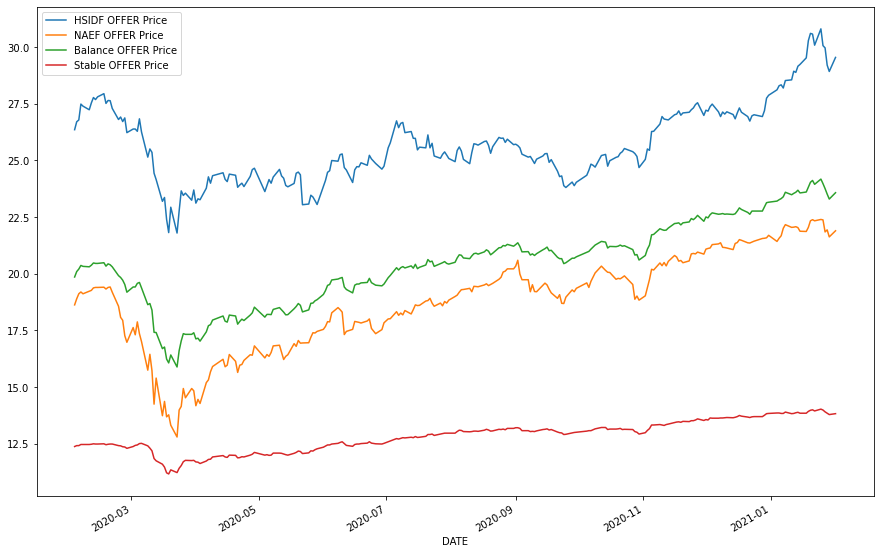

In [133]:
all_data_join.plot(y=['HSIDF OFFER Price','NAEF OFFER Price',
                      'Balance OFFER Price','Stable OFFER Price'], use_index=True, kind='line',
                   figsize=(15, 10))
plt.show()

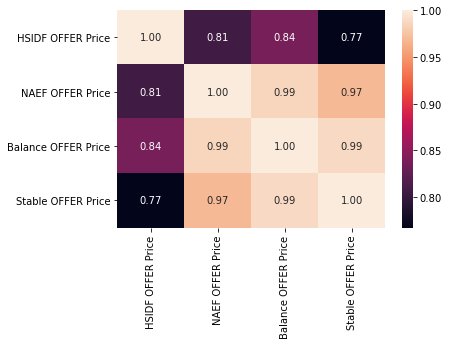

In [124]:
sns.heatmap(all_data_join.corr(), annot=True, fmt=".2f")
plt.show()